# General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 

**Names:**  Hugo Jongeneelen & Tigo Ruijs

**Title of the experiment:**  Determing the relation between force and distance between two magnets.

**Starting date:** 7 October 2021  
**Expected enddate:** 26 October 2021 


**Goal of the experiment:**  In this experiment we determine the relation of the force between two magnets as function of their mutual distance. We use the set up shown below:

<img src = 'resource/asnlib/public/IE1_opstelling.jpg' width = "300" height="20"></img>

The heart to heart distance between the two magnets can be calculated: $z = \frac{1}{2}d_m+h_1+h_{1,2}+h_2+\frac{1}{2}d_m$ 

<img src = 'resource/asnlib/public/ie1_opst_onz.jpg' width ="200" height = "20"></img>


**Research question:**  What is the relationship between the attracting and repelling force of two magnets and their heart to heart distance?

**Expectations or Hypothesis:** Our expectation is that there will be an inverse power relationship of magnitude four with the given formula: $F=\frac{3\mu_0m^2}{2\pi}\frac{1}{z^4}$

**Desired accuracy:** Since this experiment will be used for a maglev train we want our results to be very precise and may only deviate for a maximum of 3%.

# Preparation
 


**Assignments:**  

• Measure the distances given in Figure #KDJNFKSNFKSDNF

• Calculate uncertainty for the distance and force

• Conduct the experiment carefully

• Import our measurements into our notebook

• Analyze the data and make plots (with errorbar, curvefits and linearization) for our report

• Also check whether there is a systematic error (and fix it if that is the case)

• Calculate the magnetic remanence

**Method:**  
Voor de eerste meetserie gebruiken we twee aantrekkende magneten waarbij we de bovenste aantrekkende magneet langzaam naar de onderste aantrekkende magneet laten bewegen. We zijn gaan meten zodra de digitale unster een waarde gaf en hebben zo klein mogelijke intervallen genomen om zo voldoende waarden te krijgen om te plotten. Deze procedure hebben we herhaald voor de afstotende magneten


**Theory:**  
Het model, afgeleid en beschreven in Pols (2019), gaat ervan uit dat de totale potentiele energie van de magneten
gelijk is aan de som van potentiele energie van magnetische puntdipolen. Met het gegeven dat de kracht gelijk
is aan de afgeleide van de potentiele energie naar de afstand, geldt voor de kracht tussen twee magneten:

$ F_m(z) = \frac{3µ_0m^2}{2\pi} \frac{1}{z^4} = \alpha \frac{1}{z^4}$

**Independent variable: $z$**  
**Dependent variable: $F$**  
**Controlled variables: $\alpha$ or $\frac{3\mu_0m^2}{2\pi}$**  


**Measurement instruments & Settings:** 

• Mitutoyo schuifmaat

• Christenswiss hangweegschaal (Model: OR-42N)

• Liniaal op de cilinder

In [2]:
# Metingen vooraf (m) met bijbehorende onzekerheid

# Dikte van de magneet + onzekerheid
d_m = 5*10**-3
u_d_m = 0.1*10**-3

# Diepte van plastic omhulsel van bovenste magneet
h_1 = 2*10**-3
u_h_1 = 0.05*10**-3

# Diepte van plastic omhulsel van onderste magneet
h_2 = 2.5*10**-3
u_h_2 = 0.05*10**-3

# Aflees onzekerheid
u_measurement_1 = 0.5*10**-3
u_measurement_2 = 0.5*10**-3

# Onzekerheid h_12 (let op: twee keer afleesonzekerheid vanwege onder en bovenkant)
u_h_12 = np.sqrt(u_measurement_1**2+u_measurement_1**2)

# Totale onzekerheid z
u_z = np.sqrt((0.5*u_d_m)**2+u_h_1**2+u_h_12**2+u_h_2**2+(0.5*u_d_m)**2)
#Onzekerheid in kracht
u_F_1 = 0.0005*9.81
u_F_2 = 0.0005*9.81

**Procedure:**
We zijn begonnen met meten zodra de handweegschaal een waarde gaf en gestopt toen het niet meer lukte een grotere waarde te krijgen. Dit hebben we gedaan zodat we vanaf het begin tot het einde meetpunten zullen hebben met genoeg intervallen ertussen. Hierdoor krijgen we een grafiek met voldoende meetwaarden. We hebben zoveel mogelijk geprobeerd het touwtje stil te houden zodat er zo min mogelijk wrijving ontstaat tussen de cilinder en de magneet. Een verticaal touwtje is ook handig omdat je anders een krachtcomponent krijgt wat we natuurlijk niet willen. Nadat we de magneet hebben laten zakken, wachten we ook heel even zodat de handweegschaal een nauwkeurige meting geeft. Dit hebben we herhaald voor de afstotende magneet waarbij we een gewicht hebben toegevoegd voor meer/betere metingen

**Setup(drawing or picture):**  
Zie "Goal of the experiment"

**Notes:**
Onzekerheid van de kracht is verwaarloosbaar ten opzichte van de onzekerheid in de afstand

**About accuracy:**
Door het gebruik van een liniaal is de onzekerheid relatief groot. Hiervoor zouden we een ander instrument moeten zoeken.

# Execution

In [3]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!
# Raw measurements (m)

# Afstotend

# Afstand tussen plastic omhulsels van de magneten (zie "Goal of the experiment")
h_12_af = (10**-2)*np.array([2.09, 1.96, 1.78, 1.60, 1.45, 1.32, 1.11, 0.99, 0.98, 0.88, 1.34, 2.15, 1.90, 1.71, 1.49, 1.30, 1.19])

# Omgerekende afstotende kracht (*9.81)
F_af = 9.81*np.array([0.013, 0.015, 0.020, 0.026, 0.033, 0.039, 0.056, 0.074, 0.076, 0.096, 0.039, 0.013, 0.018, 0.024, 0.032, 0.043, 0.053])

# Sorteren van x en y waarden
ind = np.lexsort((F_af, h_12_af))
h_12_af = h_12_af[ind]
F_af = F_af[ind]


# Afstand tussen plastic omhulsels van de magneten (zie "Goal of the experiment")
h_12_aan = (10**-2)*np.array([1.88, 1.80, 1.71, 1.58, 1.39, 1.28, 1.10, 1.00, 0.86, 1.96, 1.84, 1.59, 1.47, 1.09, 0.98, 0.85, 1.89, 1.39])

# Omgerekende aantrekkende kracht (*9.81)
F_aan = 9.81*np.array([0.016, 0.019, 0.021, 0.027, 0.035, 0.043, 0.056, 0.071, 0.094, 0.015, 0.018, 0.026, 0.031, 0.056, 0.069, 0.089, 0.018, 0.034])

# Sorteren van x en y waarden
ind = np.lexsort((F_aan, h_12_aan))
h_12_aan = h_12_aan[ind]
F_aan = F_aan[ind]

# Berekening z

# Afstotende z
z_af = 0.5*d_m + h_1 + h_12_af + h_2 + 0.5*d_m

# Aantrekkend z
z_aan = 0.5*d_m + h_1 + h_12_aan + h_2 + 0.5*d_m

**Observations:**  De magneten oscilleerde een beetje in de cilinder waardoor er dus wrijving was en ook een krachtcomponent door de niet totaal verticale lijn. 

**Notes:**  We recalibrated in the first experiment (with the attracting magnet) after the 9th measurement (starting with measurement 1) and after the 11th.

# Processing
**Description of processing of raw data into scientific evidence:**

• First we plot the raw data without any extras.

• Now we plot the data with our calculated uncertainties, giving an overview which uncertainties play a bigger role than others.

• After that we curve fit our theory onto our measurements.

• We check whether there is a systematic error through a residual analysis

### Data processing and analysis:
First look at your data without considering measurements uncertainty. Use the next cell to insert your code to plot your measurements. Consider the rules producing graphs! 

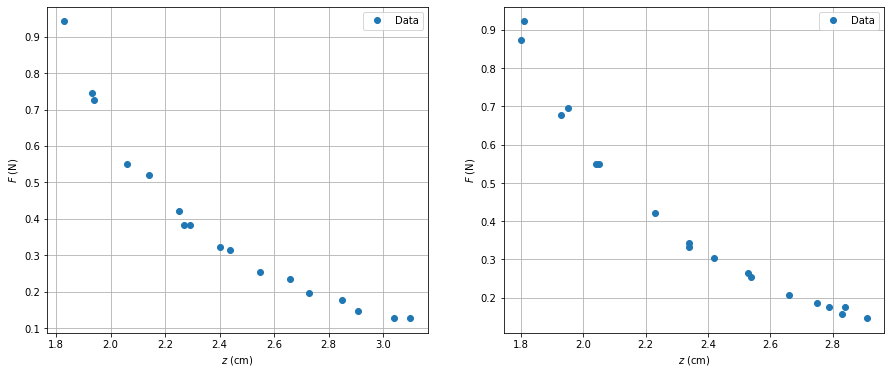

In [4]:
#Data processing and analysis:
#(F,r)-plot
%matplotlib inline

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Plot the repelling force
ax1.plot(z_af*100, F_af, 'o', label="Data")
ax1.set(xlabel='$z$ (cm)', ylabel='$F$ (N)')
ax1.grid()
ax1.legend()

# Plot the attracting force
ax2.plot(z_aan*100, F_aan, 'o', label="Data")
ax2.set(xlabel='$z$ (cm)', ylabel='$F$ (N)')
ax2.grid()
ax2.legend()

plt.show()

Now plot the same measurements with errorbars. You can use this source to find out additional options: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

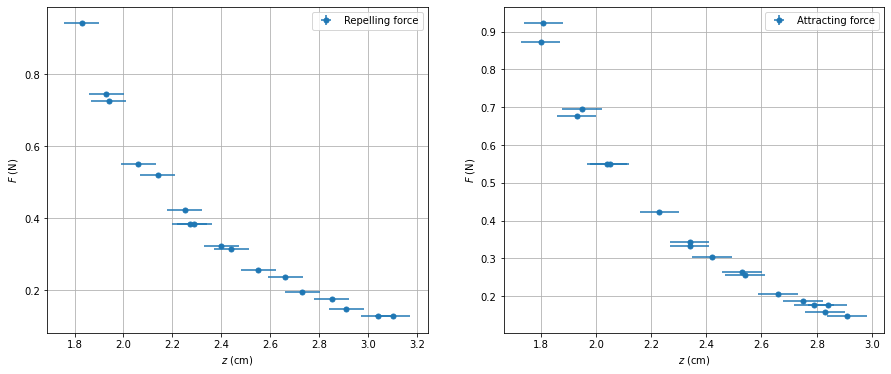

In [5]:
#Data processing and analysis:
#(F,r)-plot with errorbars
%matplotlib inline

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))


ax1.errorbar(z_af*100, F_af, xerr=u_z*np.ones_like(z_af)*100, yerr=u_F_1*np.ones_like(F_af), fmt='o', label="Repelling force", markersize=5)
ax1.set(xlabel='$z$ (cm)', ylabel='$F$ (N)')
ax1.grid()
ax1.legend()

ax2.errorbar(z_aan*100, F_aan, xerr=u_z*np.ones_like(z_aan)*100, yerr=u_F_2*np.ones_like(F_aan), fmt='o', label="Attracting force", markersize=5)
ax2.set(xlabel='$z$ (cm)', ylabel='$F$ (N)')
ax2.grid()
ax2.legend()

plt.show()

## Fitting the data 
### function fit using $z^{-4}$
There are at least two options to use a function fit to your measurements. We will look at the different methods to analyse your data below. 

As we expect the function to be in the form: $ F = \frac{a}{z^4} $ we can ask Python to fit this function. You can use this source to find out additional options: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
Think about whether measurements with the outcome $F$ = 0 N count or should be disregarded.

In [31]:
# EXPLAIN WHY INVERSE

def func(F, a):
    return abs((a/F))**(1/4)

# Curve fit voor afstotende magneten (in m)
popt_af_m, pcov_af_m = curve_fit(func, F_af, z_af, sigma=u_z*np.ones_like(z_af), absolute_sigma=True)

# Curve fit voor afstotende magneten (in cm)
popt_af, pcov_af = curve_fit(func, F_af, z_af*100, sigma=u_z*np.ones_like(z_af)*100, absolute_sigma=True)

# Curve fit voor aantrekkende magneten (in m)
popt_aan_m, pcov_aan_m = curve_fit(func, F_aan, z_aan, sigma=u_z*np.ones_like(z_aan), absolute_sigma=True)

# Curve fit voor aantrekkende magneten (in cm)
popt_aan, pcov_aan = curve_fit(func, F_aan, z_aan*100, sigma=u_z*np.ones_like(z_aan)*100, absolute_sigma=True)

# We gebruiken deze waarden van alpha voor onze berekening van het remanente veld
alpha_af = popt_af_m[0]
alpha_aan = popt_aan_m[0]

cov_af = pcov_af_m[0,0]
cov_aan = pcov_aan_m[0,0]
print(cov_af, cov_aan)

9.369930828871506e-18 8.380306492555816e-18


The printed value is the constant in the function $ F = \frac{a}{z^4} $. Make a new plot in which you show your measurements and your function fit. Part of the code is already written for you.

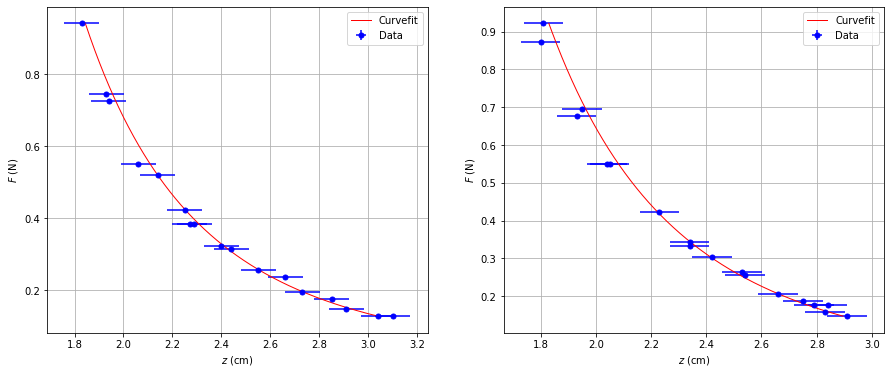

In [32]:
# (F,r)-plot with errorbars and functionfit
%matplotlib inline

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))


# Create an x-axis with enough points so our curve fit becomes smooth. Also calculate y-values with our curvefit for repelling magnets
y1 = np.linspace(min(F_af), max(F_af), 1000)
x1 = func(y1, *popt_af)

# Plot our curvefit for repelling magnets
ax1.plot(x1, y1, 'r', linewidth=1, label="Curvefit")
ax1.set(xlabel='$z$ (cm)', ylabel='$F$ (N)')
ax1.grid()



# Create an y-axis with enough points so our curve fit becomes smooth. Also calculate x-values with our curvefit for attracting magnets
y2 = np.linspace(min(F_aan), max(F_aan), 1000)
x2 = func(y2,*popt_aan)

# Plot our curvefit for attracting magnets
ax2.plot(x2, y2, 'r', linewidth=1, label="Curvefit")
ax2.set(xlabel='$z$ (cm)', ylabel='$F$ (N)')
ax2.grid()


# Put our measurements on top of the curve fit
ax1.errorbar(z_af*100, F_af, yerr=u_F_1*np.ones_like(F_af), xerr=u_z*np.ones_like(z_af)*100, fmt='ob', markersize=5, label="Data")
ax1.legend()
ax2.errorbar(z_aan*100, F_aan, yerr=u_F_2*np.ones_like(F_aan), xerr=u_z*np.ones_like(z_aan)*100, fmt='ob', markersize=5, label="Data")
ax2.legend()

plt.show()

#### Residual analysis
It is always interesting to see whether the fit is a good fit. The fit above might not be the easiest way to directly see this. We therefor use a residual analysis. In this analysis we plot our measurements - our fit. The code gives some idea of what to do. Analyse the residuals by completing the code below.

# Residual analysis

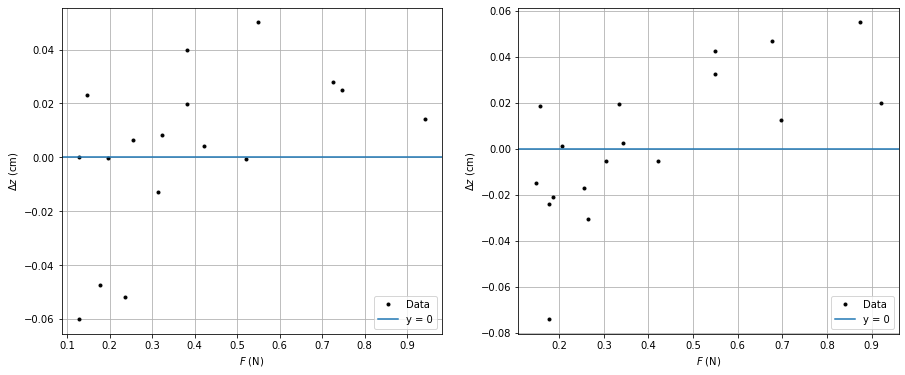

In [33]:
%matplotlib inline

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Calculate and plot the difference between theory and measurements (Repelling)
ax1.plot(F_af, func(F_af, *popt_af) - z_af*100, 'k.', linewidth=1, label = "Data")

# For better analysis we insert the line y=0 since we want our calculations to be closest to zero. (If the difference between theory and measurements is zero, it is perfect)
ax1.axhline(y=0, label="y = 0")

# Format/layout
ax1.set(xlabel='$F$ (N)', ylabel='$\Delta z$ (cm)')
ax1.grid()
ax1.legend(loc=4)


# Calculate and plot the difference between theory and measurements (Attracting)
ax2.plot(F_aan, func(F_aan, *popt_aan) - z_aan*100, 'k.', linewidth=1, label = "Data")

# For better analysis we insert the line y=0 since we want our calculations to be closest to zero. (If the difference between theory and measurements is zero, it is perfect)
ax2.axhline(y=0, label="y = 0")

# Format/layout
ax2.set(xlabel='$F$ (N)', ylabel='$\Delta z$ (cm)')
ax2.grid()
ax2.legend(loc=4)

plt.show()

#### fitting with systematic error
You were able to measure the heart-to-heart distance with a certain accuracy. You probable had to use some kind of reference point. Using a reference might lead to a systematic error. A systematic error can be introduced by looking at the function $F=\frac{a}{(z+\Delta z)^4}$, where $\Delta z$ is our systematic error.

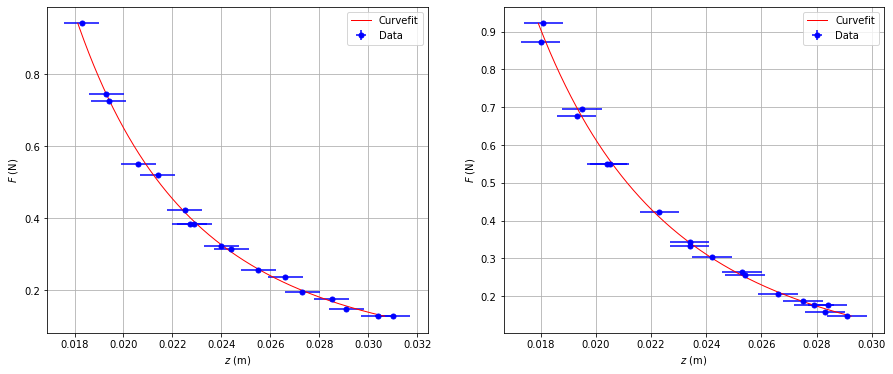

In [34]:
# EXPLAIN WHY INVERSE

def func(F, a, b):
    return (abs(a/F))**(1/4)-b

# Curve fit voor afstotende magneten
popt_af, pcov_af = curve_fit(func, F_af, z_af, sigma=u_z*np.ones_like(z_af), absolute_sigma=True)

# Curve fit voor aantrekkende magneten
popt_aan, pcov_aan = curve_fit(func, F_aan, z_aan, sigma=u_z*np.ones_like(z_aan), absolute_sigma=True)

# alpha_af = abs(popt_af[0])
# alpha_aan = abs(popt_aan[0])

# cov_af = pcov_af[0,0]
# cov_aan = pcov_aan[0,0]

# (F,r)-plot with errorbars and functionfit

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Create an y-axis with enough points so our curve fit becomes smooth. Also calculate x-values with our curvefit for repelling magnets
y1 = np.linspace(min(F_af), max(F_af), 1000)
x1 = func(y1, *popt_af)

# Format/layout
ax1.plot(x1, y1, 'r', linewidth=1, label="Curvefit")
ax1.set(xlabel='$z$ (m)', ylabel='$F$ (N)')
ax1.grid()

# Create an y-axis with enough points so our curve fit becomes smooth. Also calculate x-values with our curvefit for attracting magnets
y2 = np.linspace(min(F_aan), max(F_aan), 1000)
x2 = func(y2,*popt_aan)

ax2.plot(x2, y2, 'r', linewidth=1, label="Curvefit")
ax2.set(xlabel='$z$ (m)', ylabel='$F$ (N)')
ax2.grid()

ax1.errorbar(z_af, F_af, yerr=u_F_1*np.ones_like(F_af), xerr=u_z*np.ones_like(z_af), fmt='ob', markersize=5, label="Data")
ax1.legend()
ax2.errorbar(z_aan, F_aan, yerr=u_F_2*np.ones_like(F_aan), xerr=u_z*np.ones_like(z_aan), fmt='ob', markersize=5, label="Data")
ax2.legend()

plt.show()

### linear fit
Another option is a linear fit. As we expect the function to be in the form: $ F = \frac{a}{z^4} $ we can replace $ z^{-4} $ by $ u $. Our function will then be a linear function: $ F = a \cdot u $. This is known as coordinate transformation and is already taught at secondary school level (so you should have some experience with it!).

Make a new variable $ u $ with the values of $ z^{-4} $ and plot the graph. Make it an interactive plot where you can zoom in on certain parts of the graph. Does it look linear to you?

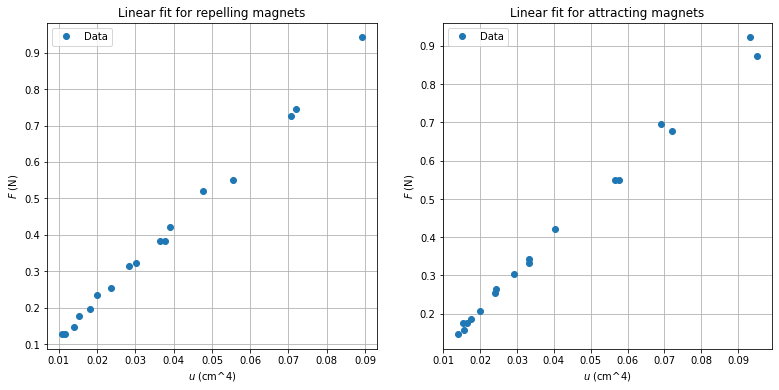

In [35]:
#(F,u)-plot without errorbars

# Substitute u for z**-4
u_af = (z_af*100)**-4
u_aan = (z_aan*100)**-4

# Interactive plot doesn't work in Vocareum

# For interactive use:
# %matplotlib notebook

# For Vocareum use:
%matplotlib inline

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

# Plot the values for repelling magnets
ax1.plot(u_af, F_af, 'o', label="Data")
ax1.set(ylabel='$F$ (N)', xlabel='$u$ (cm^4)')
ax1.set_title("Linear fit for repelling magnets")
ax1.grid()
ax1.legend()

# Plot the values for attracting magnets
ax2.plot(u_aan, F_aan, 'o', label="Data")
ax2.set(ylabel='$F$ (N)', xlabel='$u$ (cm^4)')
ax2.set_title("Linear fit for attracting magnets")
ax2.grid()
ax2.legend()

plt.show()

The errorbars are still missing in the plot. As $ u = z^{-4} $, $ u_u = 4 \cdot u_z \cdot z^{-5} $. 

Proof this.

PROOF (VERIFY! Check dictaat):

$ \frac{du}{dz} = -\frac{4}{z^5} $

So, $ \frac{du_u}{du_z} = \lvert \frac{du}{dz} \rvert = \frac{4}{z^5} $

Thus, $ du_u = \frac{4}{z^5} du_z $, hence $ u_u = \frac{4}{z^5} u_z $

Calculate the uncertainties for $ u $ and errorbarplot ($ F $, $ u $).

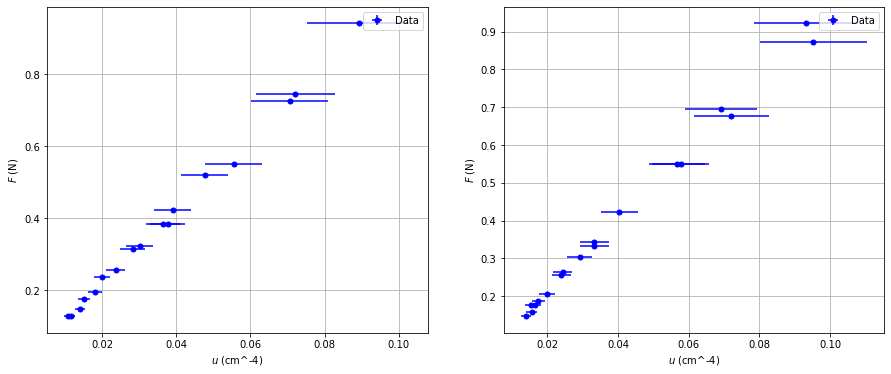

In [36]:
#(F,u)-plot with errorbars 
%matplotlib inline

# Calculate uncertainties
u_u_af = 4/((z_af*100)**5)*u_z
u_u_aan = 4/((z_aan*100)**5)*u_z

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the linear fit with uncertainties for repelling magnets
ax1.errorbar(u_af, F_af, yerr=u_F_1*np.ones_like(F_af), xerr=u_u_af*np.ones_like(u_af)*100, fmt='ob', markersize=5, label="Data")
ax1.set(xlabel='$u$ (cm^-4)', ylabel='$F$ (N)')
ax1.grid()
ax1.legend()

# Plot the linear with with uncertainties for attracting magnets
ax2.errorbar(u_aan, F_aan, yerr=u_F_2*np.ones_like(F_aan), xerr=u_u_aan*np.ones_like(u_aan)*100, fmt='ob', markersize=5, label="Data")
ax2.set(xlabel='$u$ (cm^-4)', ylabel='$F$ (N)')
ax2.grid()
ax2.legend()

plt.show()

Carry out the following steps:
* define the function for the functionfit
* curve fit 
* plot your measurements and the curve fit
* make it an interactive plot so that you can zoom in and see all essential features of the graph

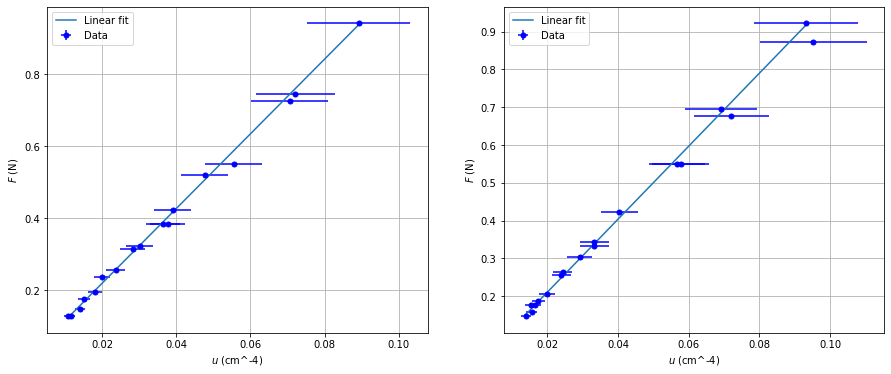

In [37]:
# (F,z)-plot with errorbars and functionfit

# Function for curvefit with uncertainty
def func(F, a, b):
    return a*F+b

#C urvefit
popt_u_af, pcov_u_af = curve_fit(func, F_af, u_af, sigma=u_u_af*np.ones_like(u_af)*100, absolute_sigma=True)
popt_u_aan, pcov_u_aan = curve_fit(func, F_aan, u_aan, sigma=u_u_aan*np.ones_like(u_aan)*100, absolute_sigma=True)

# X en Y waarde voor afstotende magneten
y1 = np.linspace(min(F_af), max(F_af), 1000)
x1 = func(y1, *popt_u_af)

# X and Y values for aantrekkende magneten
y2 = np.linspace(min(F_aan), max(F_aan), 1000)
x2 = func(y2, *popt_u_aan)

# Subplots
# Interactive plot doesn't work in Vocareum

# For interactive use:
# %matplotlib notebook

# For Vocareum use:
%matplotlib inline

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#Afstotende magneten gelineariseerde plot met onzekerheid
ax1.errorbar(u_af, F_af, yerr=u_F_1*np.ones_like(F_af), xerr=u_u_af*np.ones_like(u_af)*100, fmt='ob', markersize=5, label="Data")
ax1.plot(x1, y1, label="Linear fit")
ax1.set(ylabel='$F$ (N)', xlabel='$u$ (cm^-4)')
ax1.grid()
ax1.legend()

#Aantrekkende magneten gelineariseerde plot met onzekerheid
ax2.errorbar(u_aan, F_aan, yerr=u_F_2*np.ones_like(F_aan), xerr=u_u_aan*np.ones_like(u_aan)*100, fmt='ob', markersize=5, label="Data")
ax2.plot(x2, y2, label="Linear fit")
ax2.set(ylabel='$F$ (N)', xlabel='$u$ (cm^-4)')
ax2.grid()
ax2.legend()

plt.show()

Make additional plots that are relevant for the experiment in the given context.

In [38]:
# Additional plots of interest
# %matplotlib inline
# plt.figure()

# plt.show()

Bonus: There is at least one additional way to see what kind of exponential function ($ y = a^x $) is used. Explore this way of analyzing the data. 

In [39]:
# Extra analysis

# #Function
# def func_b(z,a):
#     return a**z

# #Curve fit with the formula
# popt_af, pcov = curve_fit(func_b, z_af, F_af, method="lm")

# #Calculate x and y values
# x = z_af
# y = func_b(z_af,*popt_af)

# #Plot Graph
# plt.plot(x,y,'r',linewidth=1)
# plt.plot(z_af,F_af,'o',linewidth=1)
# plt.errorbar(z_af, F_af, xerr=u_z*np.ones_like(z_af), yerr=u_F_1*np.ones_like(u_F_1), fmt='ob', label="Data", markersize=5)
# plt.show()

Maybe you are not satisfied with the result... find out whether there is a different relation than $ F = \frac{a}{z^4} $ that better matches your experimental data, e.g. $F = a \cdot z^{n}$...

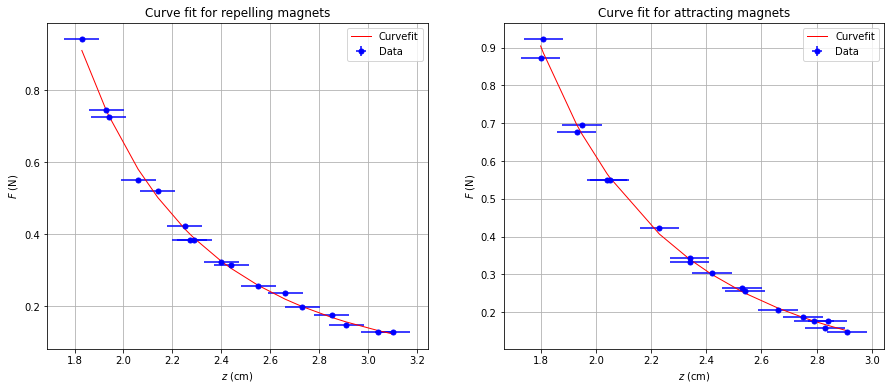

In [40]:
#Function
def func_b(z,a,n):
    return a*(z)**n

#Curve fit with the formula
popt_af, pcov = curve_fit(func_b, z_af*100, F_af, sigma=F_af*np.ones_like(F_af), absolute_sigma=True)
popt_aan, pcov_aan = curve_fit(func_b, z_aan*100, F_aan, sigma=F_aan*np.ones_like(F_aan), absolute_sigma=True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


#Calculate x and y values for repelling magnets
x = z_af*100
y = func_b(z_af*100,*popt_af)

# Plot Graph for repelling magnets
ax1.plot(x,y,'r',linewidth=1, label="Curvefit")
ax1.errorbar(z_af*100, F_af, xerr=u_z*np.ones_like(z_af)*100, yerr=u_F_1*np.ones_like(u_F_1), fmt='ob', label="Data", markersize=5)
ax1.set(ylabel='$F$ (N)', xlabel='$z$ (cm)', title="Curve fit for repelling magnets")
ax1.grid()
ax1.legend()


#Calculate x and y values for attracting magnets
x = z_aan*100
y = func_b(z_aan*100,*popt_aan)

# Plot Graph for attracting magnets
ax2.plot(x,y,'r',linewidth=1, label="Curvefit")
ax2.errorbar(z_aan*100, F_aan, xerr=u_z*np.ones_like(z_aan)*100, yerr=u_F_2*np.ones_like(u_F_2), fmt='ob', label="Data", markersize=5)
ax2.set(ylabel='$F$ (N)', xlabel='$z$ (cm)', title="Curve fit for attracting magnets")
ax2.grid()
ax2.legend()

plt.show()

**Describing the pattern in the processed data:**  


** Calculations of e.a. measurement uncertainties, and providing final answers. **

From our analysis we see that there is indeed an inverse power of 4 relationship with $\alpha=1.82*10^2$ for repelling magnets and $\alpha=1.79*10^2$ for attracting magnets (see fitting with z^-4)

In [41]:
perm = 1.25663753*10**-6 # This is the permeability of free space
alpha_1 = alpha_af
alpha_2 = alpha_aan

u_alpha_1 = np.sqrt(cov_af)
u_alpha_2 = np.sqrt(cov_aan)

h = 5*10**-3
u_h = 0.1*10**-3
r = 5*10**-3 
u_r = 0.1*10**-3

u_V = np.sqrt(((2*np.pi*r*h*u_r)**2)+((np.pi*r**2*u_h)**2))
V = np.pi*(r**2)*h

def u_m(alpha, u_alpha):
    return (np.sqrt(np.pi))/(np.sqrt(6*perm*alpha))*u_alpha

u_m_1 = u_m(alpha_1, u_alpha_1)
u_m_2 = u_m(alpha_2, u_alpha_2)

def calculation_m(alpha):
    return np.sqrt((2*math.pi*alpha)/(3*perm))

m1 = calculation_m(alpha_1)
m2 = calculation_m(alpha_2)

def u_br(u_m, m):
    return np.sqrt((((perm/V)*u_m)**2)+((((-m*perm)/(V**2))*u_V)**2))

u_br_1 = u_br(u_m_1, m1)
u_br_2 = u_br(u_m_2, m2)
    
def calculation_br(m):
    return perm*(m/V)

B_1 = calculation_br(m1)
B_2 = calculation_br(m2)

print("Het remanente veld voor afstotende magneten is {:.2f} ± {:.1f} T en voor aantrekkende magneten {:.2f} ± {:.1f} T".format(B_1, u_br_1, B_2, u_br_2))

Het remanente veld voor afstotende magneten is 1.36 ± 0.1 T en voor aantrekkende magneten 1.33 ± 0.1 T


**Notes:**  

# Discussion

Het lijkt erop alsof onze data een erg goede fit was. Het remanente veld komt in ieder geval uit in de buurt van de verwachtte waarde van 1.3 uit de specificaties van de magneet en dat valt ook binnen de onzekerheden. Echter geeft de strijdigheidsanalyse  aan dat dit incorrect is en met de meetapparatuur en methode die wij hebben gebruikt is dat ook zeker te verklaren.

# Conclusion

Wij concluderen dat het verband klopt, maar dat er zeker opgelet moet worden gezien de grootte van de onzekerheid nog. Handle with care!

# Additional notes, remarks, explanations, thoughts etc